In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from dl import Model
from dl import Dense
from dl.activations import TanH, ReLU
from dl.losses import MAE, MSE
from dl.regularization import Dropout
from dl.optimizers import StochasticGradientDescent
from dl import BatchNormalization

In [3]:
m, n = 4000, 1
inputs = np.random.randn(m, n)
outputs = 2 * inputs + 1

In [4]:
# train, val, test split
def train_test_split(inputs, outputs, pourcentage):
    m, _ = inputs.shape
    permutation = np.random.permutation(m)
    m_train = np.ceil(m * pourcentage).astype(int)

    inputs_train = inputs[permutation[:m_train]]
    inputs_test = inputs[permutation[m_train:]]

    outputs_train = outputs[permutation[:m_train]]
    outputs_test = outputs[permutation[m_train:]]

    return inputs_train, outputs_train, inputs_test, outputs_test

inputs_train, outputs_train, inputs_test, outputs_test = train_test_split(inputs, outputs, pourcentage=0.7)
inputs_val, outputs_val, inputs_test, outputs_test = train_test_split(inputs_test, outputs_test, pourcentage=0.5)

print(inputs_train.shape, outputs_train.shape)
print(inputs_test.shape, outputs_test.shape)
print(inputs_val.shape, outputs_val.shape)

(2800, 1) (2800, 1)
(600, 1) (600, 1)
(600, 1) (600, 1)


In [5]:
model = Model([
    Dense(n, 8),
    TanH(),
    BatchNormalization(),
    Dense(8, 16),
    ReLU(),
    Dense(16, 1)
])

In [7]:
n_epochs = 100
learning_rate = 0.01
batch_size = 512

In [8]:
loss = MSE()
# loss = MAE()

In [9]:
optimizer = StochasticGradientDescent(learning_rate, batch_size)

In [10]:
model.compile(loss, optimizer)

In [11]:
history = model.optimize(inputs_train, outputs_train, n_epochs, verbose=True, inputs_val=inputs_val, outputs_val=outputs_val)

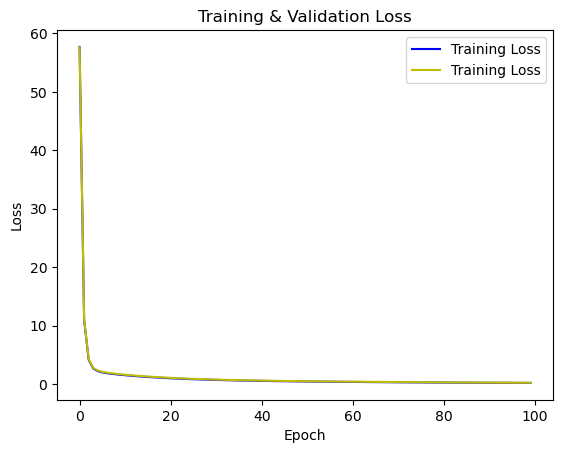

In [15]:
X = list(range(len(history["train_losses"])))
plt.plot(X, history["train_losses"], "b", label="Training Loss")
plt.plot(X, history["val_losses"], "r", label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()